In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline


In [8]:
def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

In [49]:
x_train , y_train = load_data()



In [50]:
print(f"x_train type : {type(x_train) } , shape : {x_train.shape}")
print(f"first 5 elements are : {x_train[:5]}")

x_train type : <class 'numpy.ndarray'> , shape : (97,)
first 5 elements are : [6.1101 5.5277 8.5186 7.0032 5.8598]


In [51]:
print(f"y_train type : {type(x_train)} , shape : {y_train.shape}")
print(f"first 5 elements are : {y_train[:5]}")

y_train type : <class 'numpy.ndarray'> , shape : (97,)
first 5 elements are : [17.592   9.1302 13.662  11.854   6.8233]


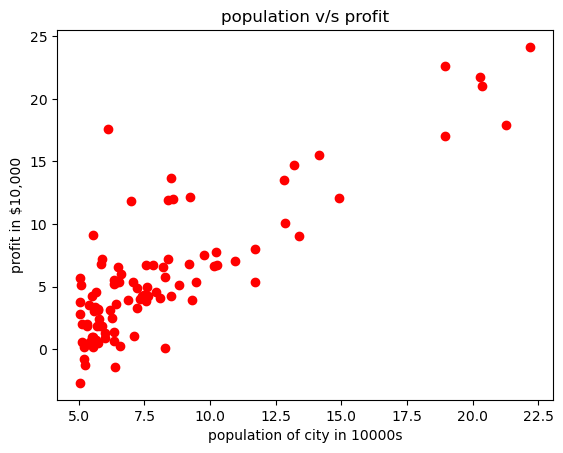

In [52]:
plt.scatter(x_train , y_train , marker="o" , color = "r")
plt.title("population v/s profit")
plt.xlabel("population of city in 10000s")
plt.ylabel("profit in $10,000")
plt.show()

In [53]:
def compute_cost (  x , y , w,b):
    m =x.shape[0]
    cost =0
    for i in range (m):
        
        f_wb = w*x[i] +b
        cost_i = (f_wb - y[i])**2
        cost =  cost +cost_i
    total_cost = cost/(2*m)
    return total_cost



In [54]:
# test Case :
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


In [55]:
def compute_gradient ( w, b , x, y):
    dj_db=0
    dj_dw=0
    m= x.shape[0]
    for i in range (m):
        dj_dw_i=( w*x[i]+b - y[i] )* x[i]
        dj_db_i =( w*x[i]+b - y[i] )
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i
    return dj_dw/m , dj_db/m
    


In [56]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient( initial_w, initial_b , x_train , y_train )
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [61]:
def compute_gradient_descent( x , y , alpha , w_in , b_in , cost_function , gradient_func , no_iterations):
    w=w_in 
    b=b_in 
    j_hist =[]
    w_hist =[]
    for i in range (no_iterations):
        dj_dw , dj_db = gradient_func(w,b,x,y)
        w= w - alpha*dj_dw
        b= b - alpha* dj_db
        if i<=100000 :
            cost =  cost_function(x,y,w,b)
            j_hist.append(cost)
        if (i% math.ceil(no_iterations/10)==0):
            w_hist.append(w)
            print(f"Iteration {i:4}: Cost {float(j_hist[-1]):8.2f}   ")
    return w , b, j_hist , w_hist 

        


In [62]:

# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = compute_gradient_descent(x_train ,y_train,alpha ,initial_w, initial_b, 
                     compute_cost, compute_gradient, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [63]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

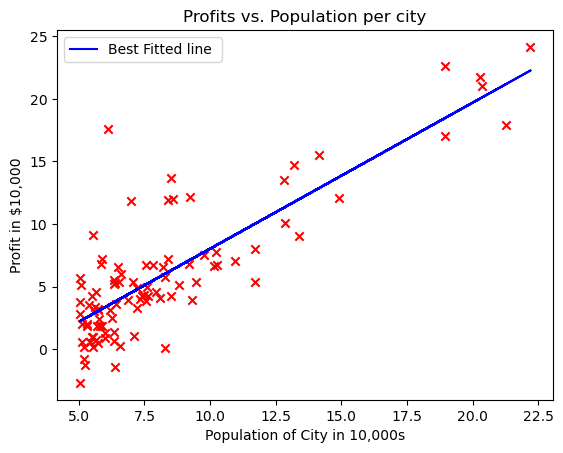

In [77]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b" , label ="Best Fitted line ")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   


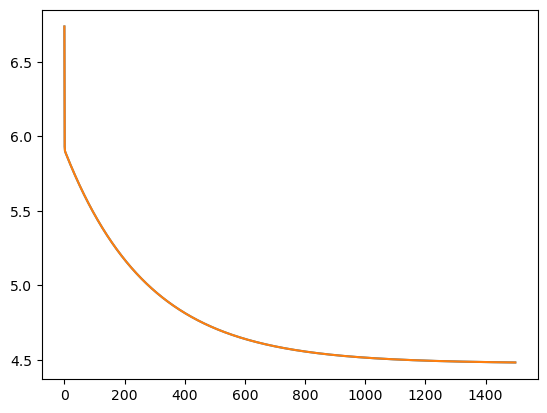

In [70]:

# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

_,_,j_hist,w_hist = compute_gradient_descent(x_train ,y_train,alpha ,initial_w, initial_b, 
                     compute_cost, compute_gradient, iterations)
plt.plot(j_hist)
plt.show()

In [76]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print(f'For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))




For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
